In [11]:
#Configuracion de entorno
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))
from src.config import Paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

paths = Paths()

In [4]:
customerData = pd.read_parquet(paths.data_clusteringFeatures)
customerData.head()

,Customer ID,rescaledRecency,rescaledLogMonetary,rescaledLogFrequency,rescaledTicketPromedio,rescaledDaysActive,rescaledLogAverageDaysOfBuys,rescaledLogUniqueProducts
0,12346.0,1.572818,-0.387182,1.129570,-0.613108,-0.297030,0.733206,-0.359486
1,12347.0,-0.957737,1.383210,0.873679,0.820827,0.506175,-0.062611,0.821543
2,12348.0,0.228311,-1.142168,-0.527249,-0.099353,-0.324323,1.882140,-1.223221
3,12349.0,-0.876106,1.103316,-0.160403,0.683849,1.161217,0.417636,0.915645
4,12350.0,0.521221,-0.520246,-1.044290,0.813924,-1.061245,-1.109066,-0.814505


In [ ]:
# Eliminamos Customer ID para poder entrenar un KMeans limpio.
numericColumns = ['rescaledRecency', 'rescaledLogMonetary', 'rescaledLogFrequency', 'rescaledTicketPromedio', 'rescaledDaysActive', 'rescaledLogAverageDaysOfBuys', 'rescaledLogUniqueProducts']
cleanData = customerData.copy()
cleanData = cleanData[numericColumns]

In [16]:
inertia = []
silhouetteScore = []
rangoK = range(2, 11)

for k in rangoK:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(cleanData)
    labels = kmeans.fit_predict(cleanData)
    score = silhouette_score(cleanData, labels)
    silhouetteScore.append(score)
    inertia.append(kmeans.inertia_)

print(f"Inertia: {inertia}")
print(f"Silhouette: {silhouetteScore}")

Inertia: [23462.000191438954, 18426.731956539305, 15991.783847865114, 14305.677281251503, 12859.243554977189, 11617.425625548585, 10612.855377237582, 9948.025416719078, 9343.21884977697]
Silhouette: [0.3366806094631913, 0.2841742837764815, 0.272062421316995, 0.2515885907402628, 0.2391119168798656, 0.24492474241446963, 0.24403555569775157, 0.2501265118466204, 0.2474734856041678]


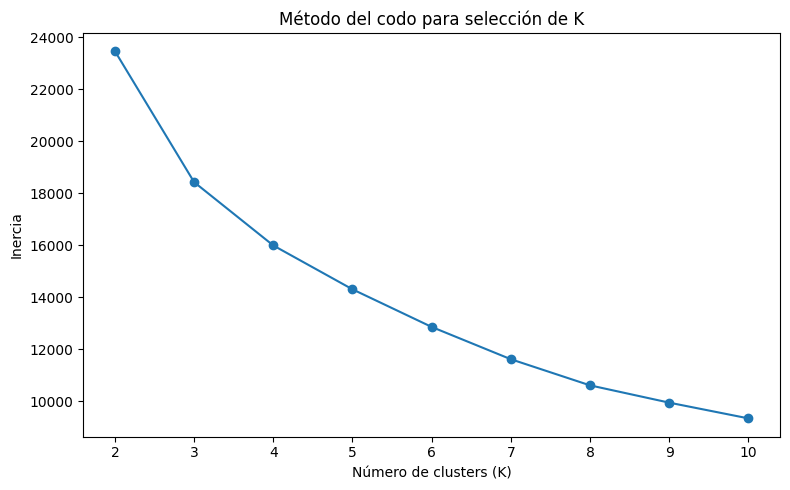

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(rangoK, inertia, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo para selección de K")
plt.xticks(rangoK)
plt.tight_layout()
plt.show()

Tenemos una inercia decreciente con un pequeno codo en K = 3

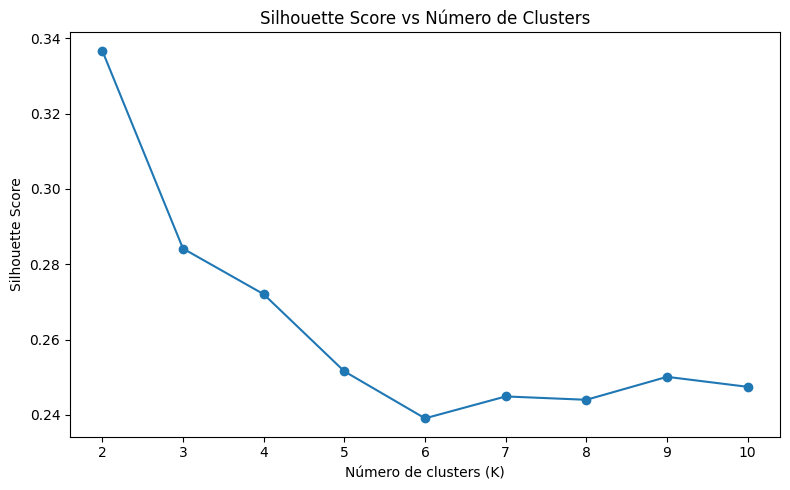

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(rangoK, silhouetteScore, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Número de Clusters")
plt.xticks(rangoK)
plt.tight_layout()
plt.show()


Baja rapidamente de 2 a 3 K, luego un poco mas lento hasta llegar 6 donde es su minimo pero en este punto la inercia es marginal entonces no nos sirve y nos quedamos con K = 3.